In [1]:
import numpy as np
import matplotlib.pyplot as plt

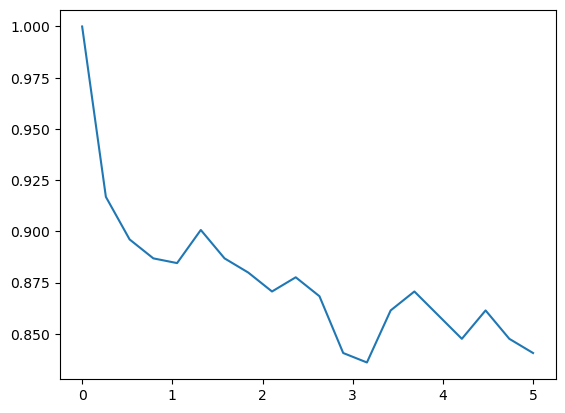

In [116]:
X = np.array([433.000000, 397.000000, 388.000000, 384.000000, 383.000000, 390.000000, 384.000000, 381.000000, 377.000000, 380.000000,  376.000000, 364.000000, 362.000000,  373.000000,  377.000000,  372.000000,  367.000000,  373.000000,  367.000000,  364.000000])
#X = np.array([447.000000, 401.000000, 388.000000, 379.000000, 381.000000, 381.000000, 378.000000, 381.000000, 383.000000, 383.000000,  390.000000, 380.000000, 377.000000, 382.000000, 380.000000, 379.000000, 379.000000, 373.000000, 370.000000, 375.000000])
#X  = np.array([452.000000,398.000000, 382.000000,382.000000,398.000000,398.000000,392.000000,388.000000,395.000000,382.000000,387.000000,378.000000,373.000000,372.000000,377.000000,379.000000,384.000000,378.000000,377.000000,378.000000])
#X = np.array([439.000000,
#              402.000000,
#              382.000000,
#              386.000000,
#              396.000000,
#              385.000000,
#              379.000000,
#              373.000000,
#              375.000000,
#              371.000000,
#              372.000000,
#              367.000000,
#              376.000000,
#              372.000000,
#              370.000000,
#              357.000000,
#              364.000000,
#              355.000000,
#              351.000000,
#              358.000000,
#              347.000000,
#              337.000000,
#              350.000000,
#              353.000000,
#              357.000000,
#              356.000000,
#              355.000000,
#              355.000000,
#              362.000000,  357.000000,  358.000000,  360.000000,  348.000000,  347.000000,  357.000000,  352.000000,  353.000000,  351.000000,  356.000000,  355.000000])
X = X / X[0]
T = np.linspace(0,5, len(X))
plt.plot(T,X)

In [117]:
import jax 
import jax.numpy as jnp
def model(t, w,b):
    return  (1 - b) * jnp.exp(- w * t ) + b

In [118]:
def loss(w,b,t,X):
    means     = model(t,w,b)
    variances = model(t,w,b)**2
    return ((means - X)**2 / variances ).mean()
loss = jax.jit(loss)
grad = jax.grad(loss,argnums = (0,1))
grad = jax.jit(grad)

In [119]:
w = 0.5
b = X[-1]
lr = 1e-3
batch = 100
for i in range(batch * 10):
    g = grad(w,b,T,X)
    new_w = w - lr * g[0]
    new_b = b - lr * g[1]
    
    if loss(new_w,new_b,T,X) <= loss(w,b,T,X):
        lr *= 1.1
        w = new_w
        b = new_b
    else:
        lr *= 0.5
    if i % batch == 0:
        print(loss(w,b,T,X))

0.001192163
0.0007420138
0.0005975891
0.00052644935
0.000483156
0.00045400206
0.00043224436
0.0004158397
0.0004030317
0.00039266478


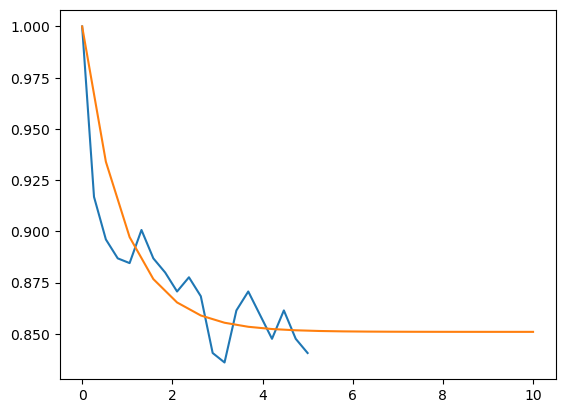

In [122]:
T = np.linspace(0,5, len(X))
plt.plot(T,X)
T = np.linspace(0,10, len(X))
X_hat = model(T,w,b)
plt.plot(T,X_hat)

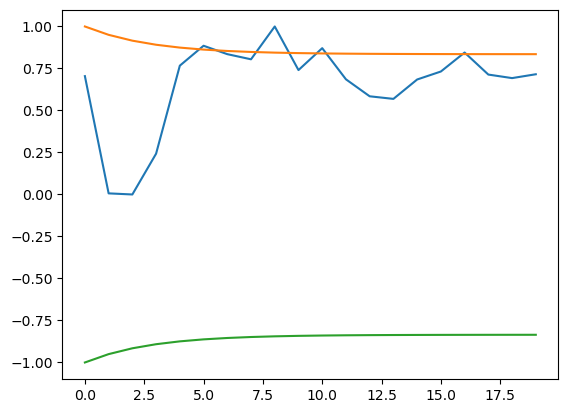

In [110]:
residui  = (X - X_hat)
residui = (residui - residui.min()) / (residui.max() - residui.min())
plt.plot( residui )
plt.plot( model(T, w,b) )
plt.plot(  - model(T, w,b) )